> # PROJEKT Statystyka i Analiza Danych

## 1. Opis zbioru

Dane obserwacyjne pochodzą z oficjalnej strony Międzynarodowej Federacji Szachowej FIDE https://ratings.fide.com/download_lists.phtml i zawierają podstawowe informacje na temat wszystkich zawodników posiadający takowy ranking dla szachów klasycznych w maju 2020 roku. 

Poszczególne kolumny w tabeli danych zawierają:
- `ID`: numer identyfikacyjny zawodnika
- `Name`: imię i nazwisko zawodnika
- `Fed`: kraj pochodzenia zawodnika
- `Sex`: płeć
- `Tit`: tytuł zawodnika (GM - Grand Master, WGM - Woman Grnad Master, IM - Interntional Master, WIM - Woman International Master, FM - FIDE Master, WFM - Woman FIDE Master, CM - Candidate Master, WCM - Woman Candidate Master, H - Honorary Grand Master, WH - Woman Honorary Grand Master)
- `WTit`: żeński tytuł zawodnika
- `OTit`: inny tytuł zawodnika (IA - International Arbiter, FA - FIDE Arbiter, NA - National Arbiter, IO - International Organizer, FT - FIDE Trainer, FST - FIDE Senior Trainer, DI - Developmental Instructor, NI - National Instructor)
- `FOA`: tytuł FIDE Online Arena (AGM - Arena Grandmaster, AIM - Arena International Master, AFM - Arena FIDE Master, ACM - Arena Candidate Master)
- `Rank`: ranking FIDE
- `Gms`: ilość gier zagranych w maju 2020
- `K`: współczynnik rozwoju (K = 40 dla nowych zawodników, aż do rozegrania co najmniej 30 zaliczanych do rankingu partii)
- `Birth`: rok urodzenia
- `Flag`: flaga aktywoności (i/wi - zawodnik nieaktywny meżczyzna/kobieta, w - zawodniczka aktywna, flaga pusta ""- zawodnik aktywny)

Przed jakąkolwiek analizą sprawdzam jak wyglądają dane:

In [3]:
head(fide)

ID,Name,Fed,Sex,Tit,WTit,OTit,FOA,Rank,Gms,K,Birth,Flag
25121731,A C J John,IND,M,,,,,1063,0,40,1987,i
35077023,A Chakravarthy,IND,M,,,,,1151,0,40,1986,i
10207538,"A E M, Doshtagir",BAN,M,,,,,1840,0,40,1974,i
10680810,"A hamed Ashraf, Abdallah",EGY,M,,,,,1728,0,40,2001,
5716365,"A Hamid, Harman",MAS,M,,,NI,,1325,0,40,1970,i
10206612,"A K M, Sourab",BAN,M,,,,,1598,0,20,0000,


Aby ułatwić sobie bardziej dogłębną eksplorację danych tworzę dodatkowe kolumny z wartościami logicznymi w zależności od tego czy zawodnik jest aktywny oraz, czy posiada jakiś tytuł szachowy zdobyty w rzeczywistości, a także nową kolumnę z wiekiem zawodnika.

Sprawdzam także jak wyglądają statystyki dla poszczególnych kolumn. Szczególnie istotne są dla mnie kolumny `Rank` oraz `Age`.

In [6]:
summary(fide)

       ID                Name               Fed                Sex           
 Min.   :   100013   Length:360893      Length:360893      Length:360893     
 1st Qu.:  2185725   Class :character   Class :character   Class :character  
 Median :  9401350   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 17110080                                                           
 3rd Qu.: 24550191                                                           
 Max.   :651076543                                                           
     Tit                WTit               OTit               FOA           
 Length:360893      Length:360893      Length:360893      Length:360893     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                     

Kolejnym problemem jest brakująca wartość roku narodzenia u 8695 zawodników. Stanowią oni około 2,5% wszystkich danych. Aby móc coś zrobić z tymi brakującymi danymi, sprawdzam czy brakująca wartość nie zależy od wartości innej zmiennej, czy są to losowe obiekty. Ostateczne postanowiłam usunąć te dane, w których brakuje daty urodzenia.

Finalnie ramka danych `fide` zawiera 352198 obiektów oraz 17 atrybutów.

In [8]:
head(fide)

ID,Name,Fed,Sex,Tit,WTit,OTit,FOA,Rank,Gms,K,Birth,Flag,Age,Active,Title,Women
25121731,A C J John,IND,M,,,,,1063,0,40,1987,i,33,FALSE,FALSE,FALSE
35077023,A Chakravarthy,IND,M,,,,,1151,0,40,1986,i,34,FALSE,FALSE,FALSE
10207538,"A E M, Doshtagir",BAN,M,,,,,1840,0,40,1974,i,46,FALSE,FALSE,FALSE
10680810,"A hamed Ashraf, Abdallah",EGY,M,,,,,1728,0,40,2001,,19,TRUE,FALSE,FALSE
5716365,"A Hamid, Harman",MAS,M,,,NI,,1325,0,40,1970,i,50,FALSE,FALSE,FALSE
5045886,"A K, Kalshyan",IND,M,,,,,1777,0,20,1964,i,56,FALSE,FALSE,FALSE


In [9]:
summary(fide)

       ID                Name               Fed                Sex           
 Min.   :   100013   Length:352198      Length:352198      Length:352198     
 1st Qu.:  2146572   Class :character   Class :character   Class :character  
 Median :  9931900   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 17343580                                                           
 3rd Qu.: 24596198                                                           
 Max.   :651076543                                                           
     Tit                WTit               OTit               FOA           
 Length:352198      Length:352198      Length:352198      Length:352198     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                     

## 2. Analiza eksploracyjna

Na sam początek sprawdzam jak wygląda wykres rozkładu gęstości dwóch najbardziej interesujących mnie atrybutów: `Age` oraz `Rank`. Można zauważyć, że najwięcej jest młodych zawodników z niskim rankingiem FIDE, dopiero zaczynających przygodę z królewską grą. Zaznaczyłam również średnie wartości dla tych atrybutów, które wynoszą odpowiednio 37.5 roku oraz 1656 punktów rankingu FIDE.

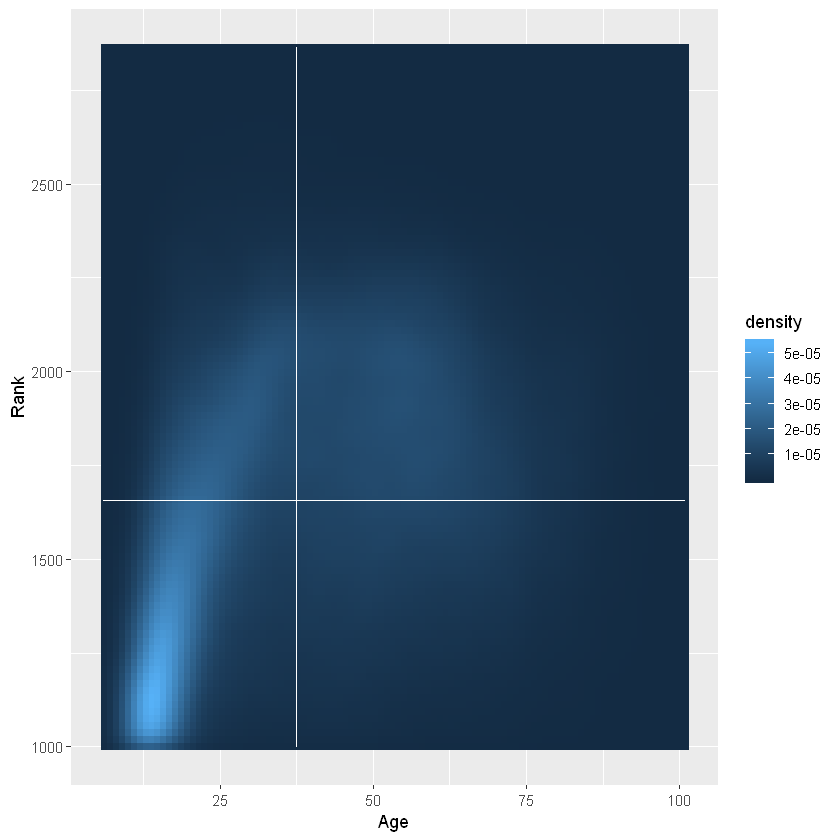

In [12]:
ggplot(fide, aes(x = Age, y = Rank))+
stat_density_2d(aes(fill = ..density..), geom = "raster", contour = FALSE) +
geom_line(mapping = aes(y = mean(fide$Rank)), color = "white") +
geom_line(mapping = aes(x = mean(fide$Age)), color = "white")

Aby dokładniej przyjrzeć się atrybutowi `Age` wykonałam jego histogram. Widać na nim bardzo dobrze pik w okolicach 14-15 roku życia, jest to histogram lewostronnie skośny. Zastanawiać może mały "pik" w okolicach 50 roku życia, którego potencjalną przyczyną mogą być usunięte wcześniej obiekty bez właśnie tego atrybutu. "Pik" występuje w histogramie wieku zawodników aktywnych jak i nieaktywnych.

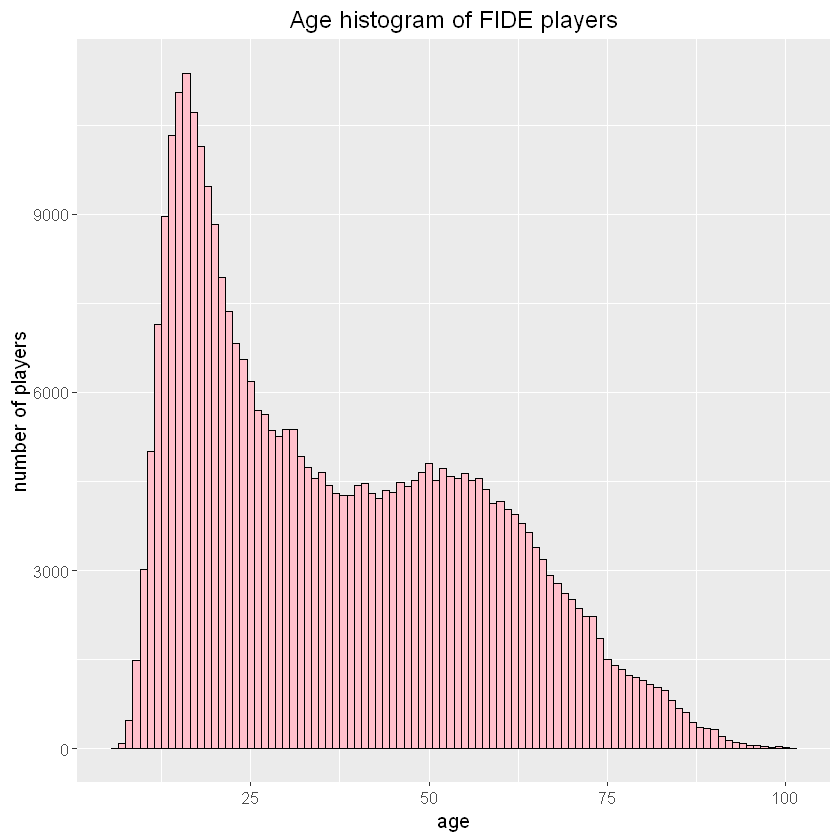

In [233]:
ggplot(data = fide, aes(x = Age))+
geom_histogram(binwidth = 1, color = "black", fill = "pink") +
theme(text=element_text(size=12), plot.title = element_text(hjust = 0.5)) + 
ggtitle("Age histogram of FIDE players") +
scale_x_continuous(name = "age") +
scale_y_continuous(name = "number of players")

Przechodząc do histogramu drugiego najważniejszego atrybutu `Rank` można zauważyć, że jest on unimodalny. Lewa strona jest mniej stroma od prawej i ucięta ponieważ minimalna wartość rankingu FIDE wynosi 1001. Powodem jest również bardzo duża ilość poczatkujących graczy w strosunku do tych bardziej zaawansowanych. Prawa strona jest znacznie bardziej stroma, ponieważ powyżej pewnego poziomu coraz trudniej jest dalej ulepszać swoją grę.

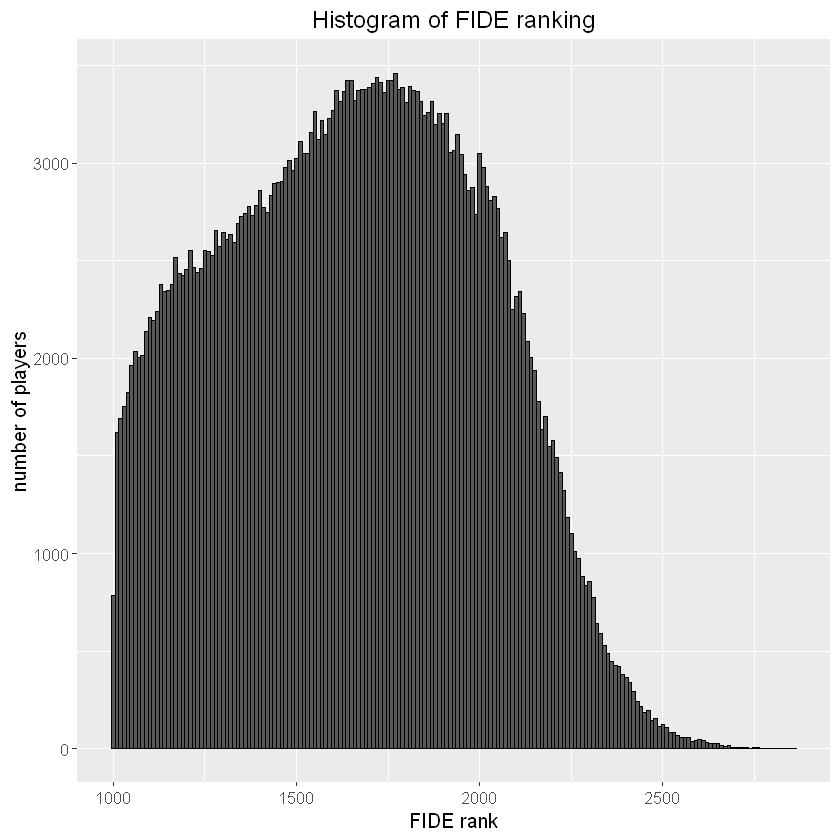

In [26]:
ggplot(data = fide, aes(x = Rank))+
geom_histogram(binwidth = 10, color = "black") +
theme(text=element_text(size=12), plot.title = element_text(hjust = 0.5)) + 
ggtitle("Histogram of FIDE ranking") +
scale_x_continuous(name = "FIDE rank") +
scale_y_continuous(name = "number of players")

Następnie chciałabym sprawdzić jak wygląda rozkład gęstości rankingu w zależności od płci. Widać, że przesunięcie piku wykresu dla kobiet oraz mężczyzn wynosi ponad 500 punktów rankingu. Jeżeli przyjrzeć się dalej wykresom pudełkowym porównującym `Rank` oraz `Age` z podziałem na płeć oraz aktywność zawodnika można zauważyć, że w przypadku mężczyzn mediana i rozkład obu tych zmiennych jest bardzo podobny dla aktywnych jak i nieaktywnych zawodników. Na wykresie zmiennej `Age` brak jakichkolwiek wartości odstających, w przypadku `Rank` jest to tylko grupa najlepszych zawodników. Zupełnie inaczej wygląda to u kobiet. Średnia wieku aktywnych zawodniczek nie przekracza 20 lat, połowa z nich mieści się w przedziale 13-25 lat, bardzo wiele jest też obserwacji odstających, czyli takich które oddalone są o 1.5 roztępu międzykwartylowego od trzeciego kwantyla. Podobnie sytuacja wygląda u nieaktywnych zawodniczek. Można zauważyć, że połowa kobiet decyduje się na zakończenie kariery szachowej niedługo po ukończeniu okresu juniorskiego.

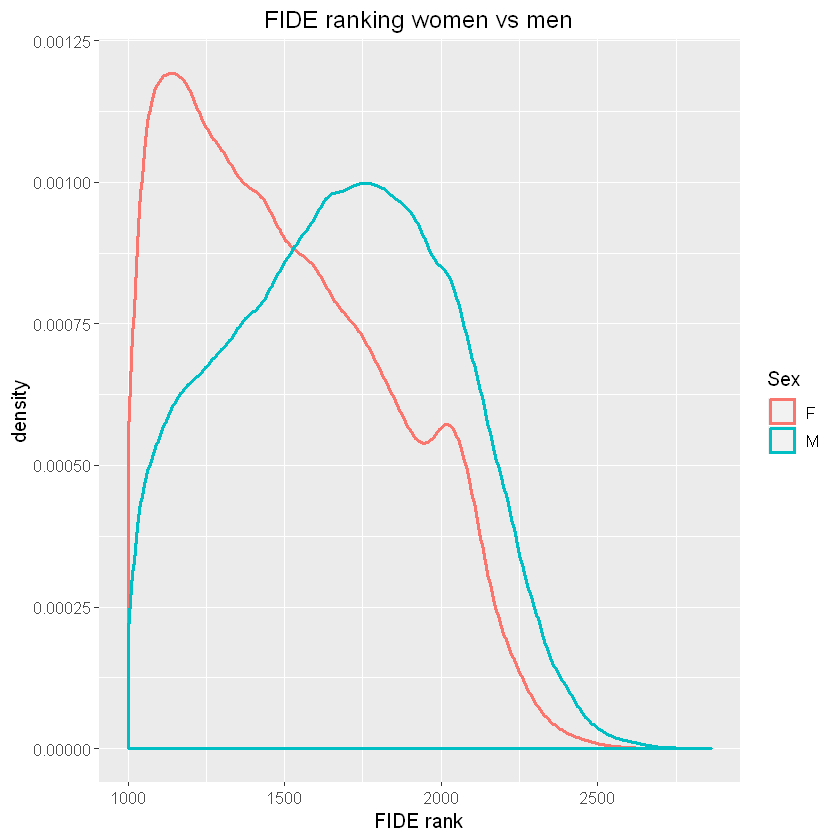

In [27]:
ggplot(fide, aes(x = Rank, color = Sex)) + 
geom_density(size = 1)+
theme(text=element_text(size=12), plot.title = element_text(hjust = 0.5)) +
ggtitle("FIDE ranking women vs men") +
scale_x_continuous(name = "FIDE rank") 

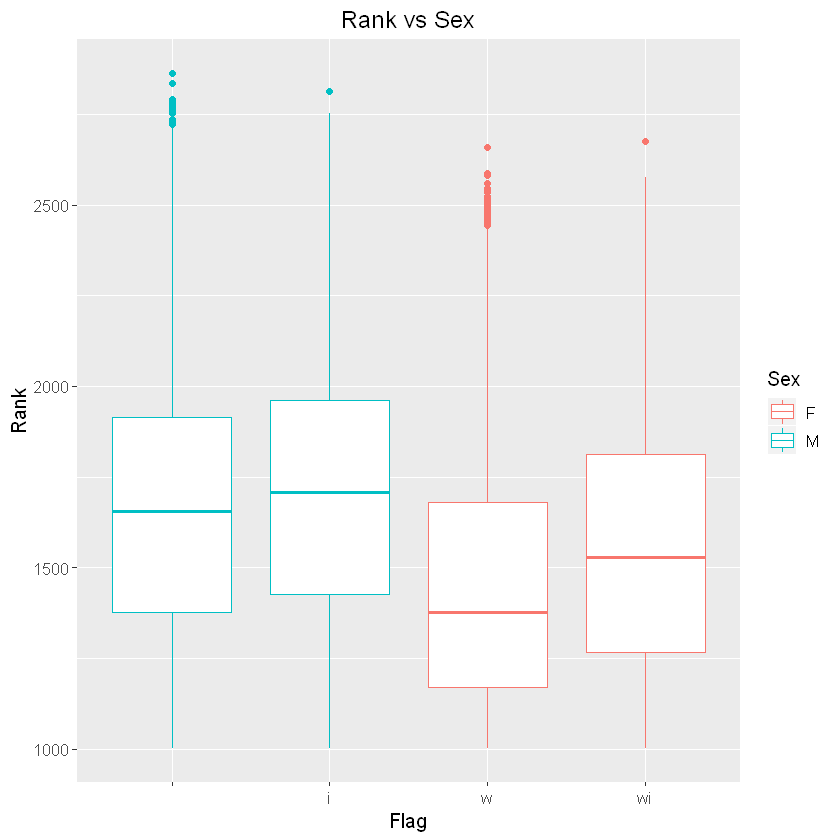

In [230]:
ggplot(fide, aes(x = Flag, y = Rank, color = Sex)) +
geom_boxplot() +
theme(text=element_text(size=12), plot.title = element_text(hjust = 0.5)) + 
ggtitle("Rank vs Sex") +
scale_fill_manual( values=c("red", "blue"))

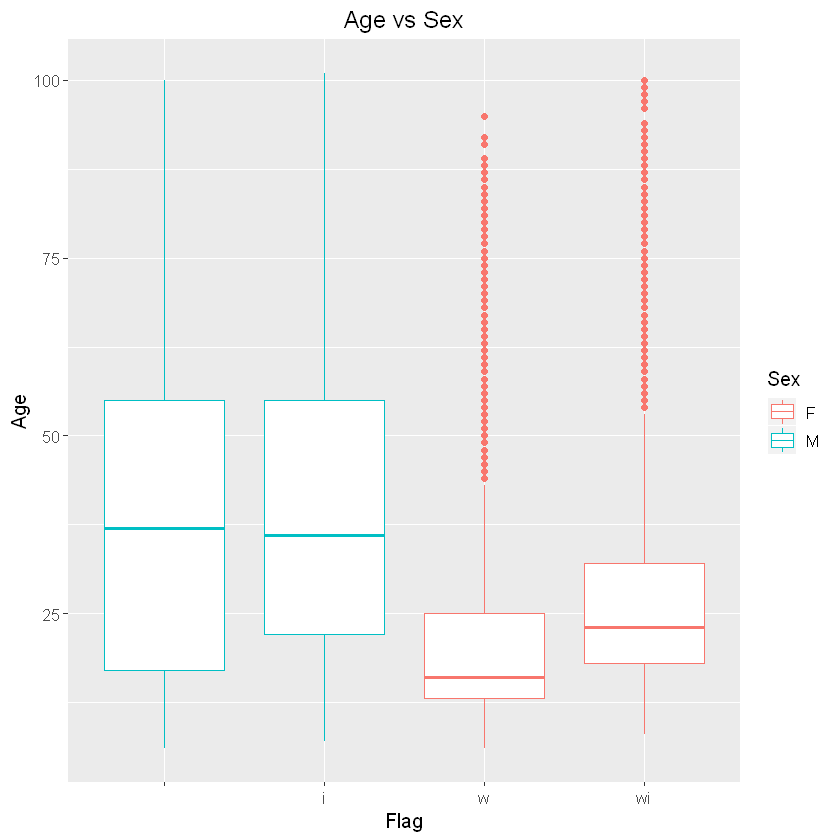

In [231]:
ggplot(fide, aes(x = Flag, y = Age, color = Sex)) +
geom_boxplot() +
theme(text=element_text(size=12), plot.title = element_text(hjust = 0.5)) + 
ggtitle("Age vs Sex")

Skoro badamy zależność zmiennych `Active` oraz `Sex` chciałam sprawdzić jak wygląda rozkład obiektów w całej populacji zgodnie z tymi atrybutami. Nie jest zaskoczeniem, że przeważajaca ilość zawodników to mężczyźni, jeżeli jednak chodzi o stosunek aktywnych do nieaktywnych zawodników wynosi on praktycznie 1:1 w obu frakcjach.

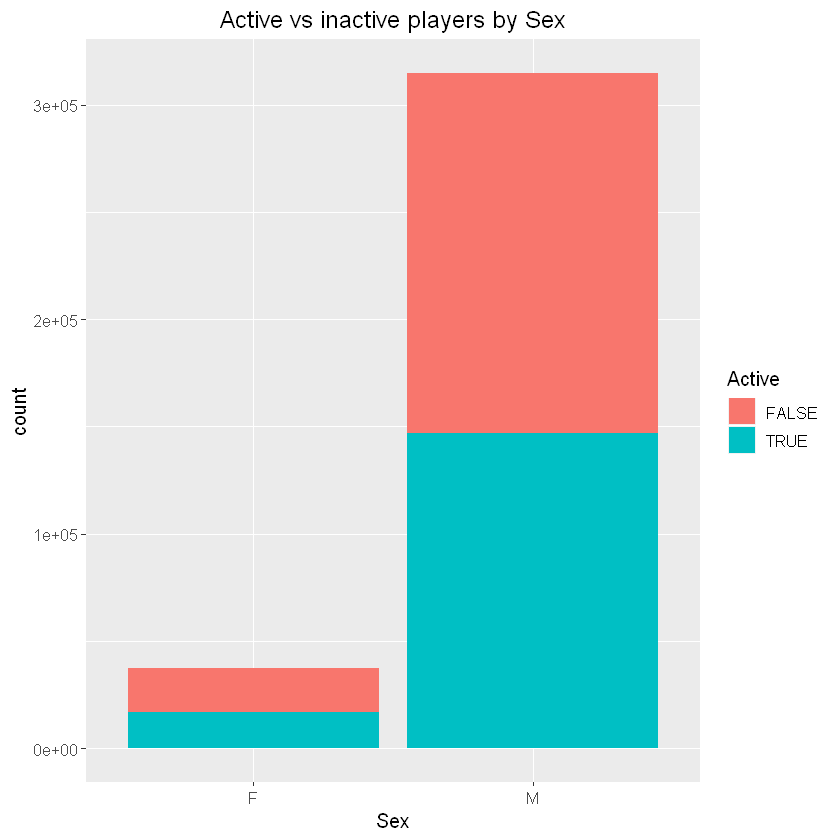

In [29]:
ggplot(fide, aes(x = Sex))+ 
geom_bar(aes(fill = Active)) + 
theme(text=element_text(size=12), plot.title = element_text(hjust = 0.5)) + 
ggtitle("Active vs inactive players by Sex")

Badając dalej różnice między płciami, chciałam sprawdzić jak zmienia się średni ranking aktywnych zawodników na przestrzeni lat. W przypadku juniorów utrzymuje się stała różnica około 100 punktów na korzyść mężczyzn. W okolicach 30 roku życia średni ranking kobiet przewyższa wynik mężczyzn. Wraz ze wzrostem wieku liczba zawodniczek jest coraz mniejsza stąd wynikają wahania średniego rankingu tej frakcji.

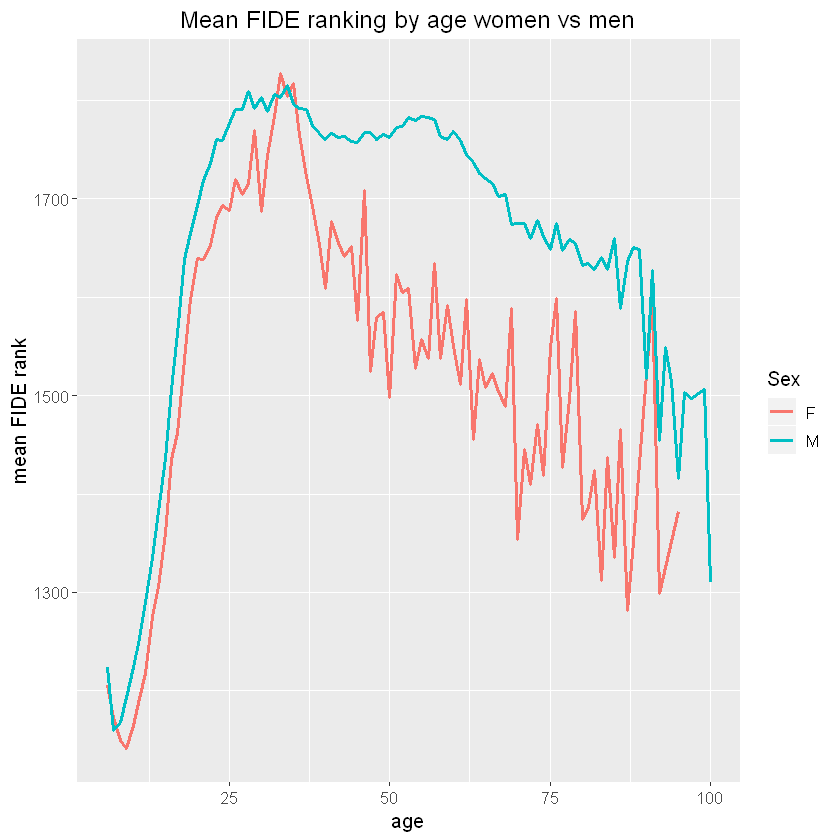

In [30]:
ggplot(all, aes(x = Age, y = mean, color = Sex))+
geom_line(size = 1) +
theme(text=element_text(size=12), plot.title = element_text(hjust = 0.5)) + 
ggtitle("Mean FIDE ranking by age women vs men") +
scale_x_continuous(name = "age") +
scale_y_continuous(name = "mean FIDE rank")

Zastanawiając się skąd wynika przewaga średniego ranking kobiet nad mężczyznami w okolicach 30 roku życia, wykorzystam zmienną `Title` aby sprawdzić jak wygląda procentowa ilości aktywnych utytułowanych zawodników w danej frakcji płci w zależności od wieku. Okazuje się, że po ukończeniu wieku juniorskiego procent utytułowanych zawodników w całej populacji aktywnych zawodników jest znacznie większy u kobiet niż u mężczyzn. Na karierę seniorską decydują się te zawodniczki, które posiadają pewnien poziom i mają szansę osiągnąć sukces. Jako, że do otrzymania tytułu wymagana jest opowiednia wartość rankingu FIDE mogło to wpłynąć na średni ranking.

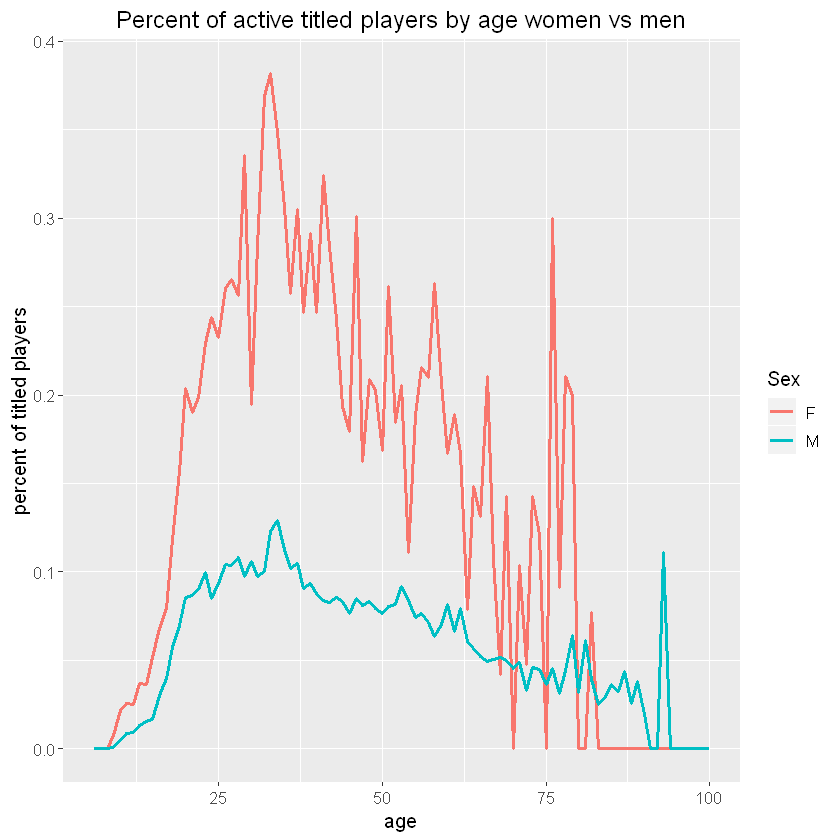

In [32]:
ggplot(sum_titled, aes(x = Age, y = titled, color = Sex)) +
geom_line(size = 1) +
theme(text=element_text(size=12), plot.title = element_text(hjust = 0.5)) +
ggtitle("Percent of active titled players by age women vs men") +
scale_x_continuous(name = "age") +
scale_y_continuous(name = "percent of titled players")

Zostając przy utytułowanych kobietach, chciałam sprawdzić jak wygląda rozkład poszczególnych tytułów w zależności od wieku, bo w końcu tytuł tytułowi nie równy. Okazuje się, że tytuły szachowe ułożone w kolejności rosnącej według mediany wieku zawodniczek ustawione są w tej samej kolejności jeżeli chodzi o wymagany ranking FIDE do otrzymania danego tytułu (więcej informacji: https://pl.wikipedia.org/wiki/Tytu%C5%82y_i_kategorie_szachowe). Wyjątkiem jest tutaj oczywiście tytuł WH, który przyznawany jest honorowo dla zawodników weteranów.

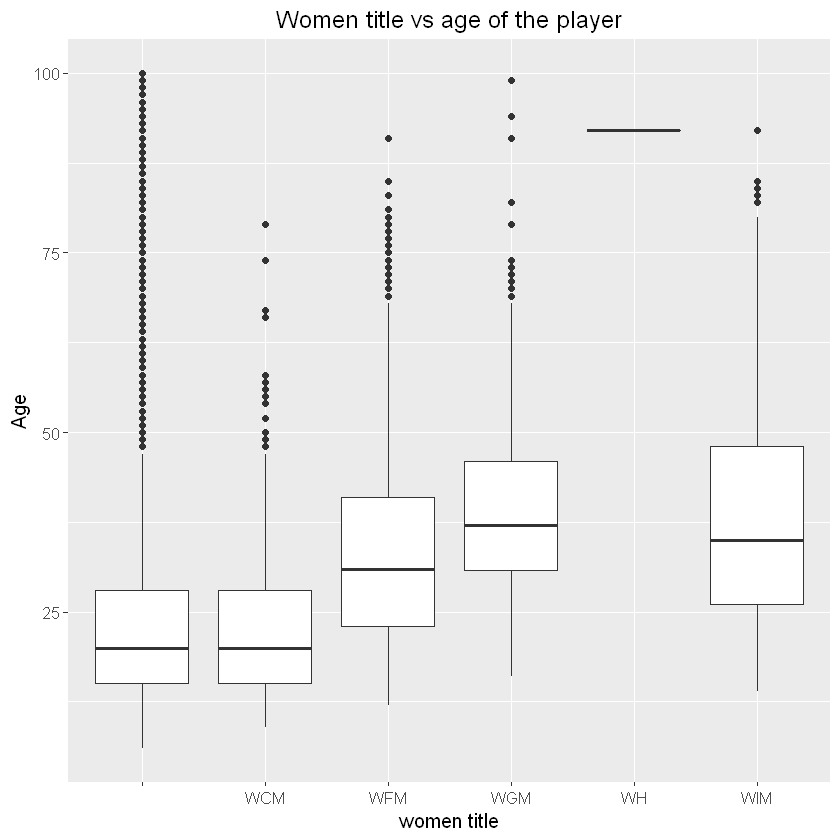

In [54]:
ggplot(fide_women, aes(x = WTit, y = Age)) +
geom_boxplot() +
theme(text=element_text(size=12), plot.title = element_text(hjust = 0.5)) + 
ggtitle("Women title vs age of the player") +
labs(x = "women title")

## 3. Testy statystyczne

### 3.1 Rosja to najbardziej utytułowany kraj pod względem zdobytych tytułów mistrza świata. Chcę sprawdzić czy istnieje zależność pomiędzy uzyskaniem tytułu szachowego a posiadaniem narodowości rosyjskiej. Poziom istotności wynosi $\alpha $ = 0.01. 


- Do zbadania niezależności zmiennych jakościowych wykorzystam test $ \chi^2 $.
- Załozenia: próba losowa prosta z niezależnymi obserwacjami oraz ∀i,jEi j > 5.

**H0 - posiadanie tytułu szachowego jest niezależne od posiadania narodowości rosyjskiej**

**H1 - posiadanie tytułu szachowego jest zależne od posiadania narodowości rosyjskiej**

Aby wykonać test wylosowałam próbę n = 10000 z populacji 352198 obiektów.

In [56]:
set.seed(2)
n = sample(1:dim(fide)[1], 10000)
test <- fide[n,]

test_RUS <- test %>% group_by(Fed) %>% 
summarize(sum_title = sum(Title), suma = n(), non_title = suma - sum_title) %>% 
arrange(desc(sum_title))
test_RUS1 <- test_RUS %>% filter(Fed == "RUS")

test_other <- test_RUS %>% filter(Fed != "RUS") %>% 
summarize(Fed = "OTHER", sum_title = sum(sum_title), suma = sum(suma),non_title = suma - sum_title,)
test_all <- merge(test_RUS1,test_other, all=TRUE)

RUS/titled | TRUE    | FALSE  | SUM     |
    ------:|:-------:|:------:|:-------:|
      TRUE |   79    | 892    |   971   |
     FALSE |  469    | 8560   |   9029  |
     SUM   |    548  |  9452  |  10000  |

RUS/titled | TRUE    | FALSE  | SUM     |
    ------:|:-------:|:------:|:-------:|
      TRUE |   53,21 | 917,79 |   971   |
     FALSE |  494,79 | 8534,21|   9029  |
     SUM   |    548  |  9452  |  10000  |

Wyliczam charakterystykę $ \chi^2 $ z 1 stopniem swobody.

$ \chi_{1}^2 = 14.647 $

Zbiór krytyczny: $ (6,6349, + \infty ) $

**A zatem odrzucamy H0.** Posiadanie narodowości rosyjskiej ma związek z otrzymaniem tytułu szachowego.

### 3.2  Chcę zbadać czy frakcja zawodników - utytułowanych juniorów w Polsce (9 w próbie 300 elementowej) jest taka sama, jak frakcja utytułowanych juniorów na całym świecie, czy też jest inna?  Frakcja utytułowanych zawodników poniżej 18 roku życia na świecie wynosi 0,019. Poziom istotności wynosi $\alpha $ = 1%.


Zakładam niezalezność prób, dodatkowo próba jest duża więc możemy zastosować Centralne Twierdzenie Graniczne. 
Aby się upewnić sprawdzam warunek dla rozkładu dwumianowego: 
 -  $ n \cdot p_0 = 0.019 \cdot 300 = 5.7 > 5 $
 - $ n(1-p_0) = 294.3 >5 $

Aby wykonać test użyję testu Z.

**H1 - frakcja utytułowanych zawodników jest taka sama $ (p = 0.019) $**

**H2 - frakcja utytułowanych zawodników jest inna $ (p \neq 0.019) $**

Aby wykonać ten test wylosowałam próbkę losową n = 300 z populacji 2209 obiektów.

In [43]:
set.seed(10)
POL18 <- fide18 %>% filter(Fed == "POL") %>% select("Sex","Age","Title","Fed")
numbers <-sample(1:dim(POL18)[1], 300)
fide_sample <- POL18[numbers,]

titlePOL <- fide_sample %>% group_by(Title) %>% summarize(sum = n())

$ \sigma_0 = \sqrt {0.019 \cdot (1 - 0.019)} = 0,1365 $

$ Z = \frac{\frac{9}{300} - 0.019}{\frac{\sigma_0}{\sqrt{300}}} = 1.3955 $

Zbiór krytyczny: $ (- \infty ,-2.58) \cup (2.58, + \infty ) $

**Nie możemy odrzucić H0.**

Błąd I rodzaju jest kontrolowany poprzez ustalenie progu istotnosci alfa i jest popełniany właśnie z takim prawdopodobienstwem.

Jeżeli chodzi o błąd II rodzaju wpływ na niego ma różnica między odchyleniem standardowym populacji a próby, a więc wielkość próby. Dodatkowo zmniejszanie $ \alpha $ jeszcze bardziej utrudnia odrzecuenie H0, a zatem zwiększa $ \beta $.

### 3.3 Czy procent utytułowanych zawodników w danej narodowości wpływa na jej średni ranking?

Aby wykonać test utworzyłam próbę losową n = 10000 z 352198 obiektów populacji.

In [213]:
set.seed(10)
numbers <-sample(1:dim(fide)[1], 10000)
fide_sample <- fide[numbers,]

Aby sprawdzić czy zmienne objaśniające w utworzonym modelu ma istotny wpływ na zmienną objaśnianą- średni ranking - **wykonam test F** dla $\alpha = 0.01 $.

H0 - $\beta_1 = 0$

H1 - $\beta_1 \neq 0$

In [229]:
model_titled <- lm(rank ~ titled, fide_model)
cor(fide_model$rank,fide_model$titled)

[1] 0.40137

In [220]:
summary(model_titled)


Call:
lm(formula = rank ~ titled, data = fide_model)

Residuals:
    Min      1Q  Median      3Q     Max 
-629.53 -141.28   24.31  156.43  468.25 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1560.75      15.13 103.151  < 2e-16 ***
titled        402.79      56.79   7.093 1.22e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 214.9 on 262 degrees of freedom
Multiple R-squared:  0.1611,	Adjusted R-squared:  0.1579 
F-statistic: 50.31 on 1 and 262 DF,  p-value: 1.221e-11


Wartość krytyczna rozkładu F(1,262) wynosi 6.73, a zatem odrzucamy H0.

Wartość bezwzględna współczynnika korelacji mierzy siłę liniowej zależności zmiennych. Korelacja między średnim rankingiem a procentem utytuowanych zawodników jest bardzo słaba, ponieważ współczynnik wynosi 0.4. 

Najważniejszym punktem przy tworzeniem modelu regresji jest jednak sprawdzenie jego założeń: 

- związek pomiędzy zmiennymi jest liniowy
- rozkład reszt jest normalny, z wartością oczekiwaną równą 0
- stała wariancja reszt, niezależąca od zmiennej wyjaśniającej
- niezależne obserwacje

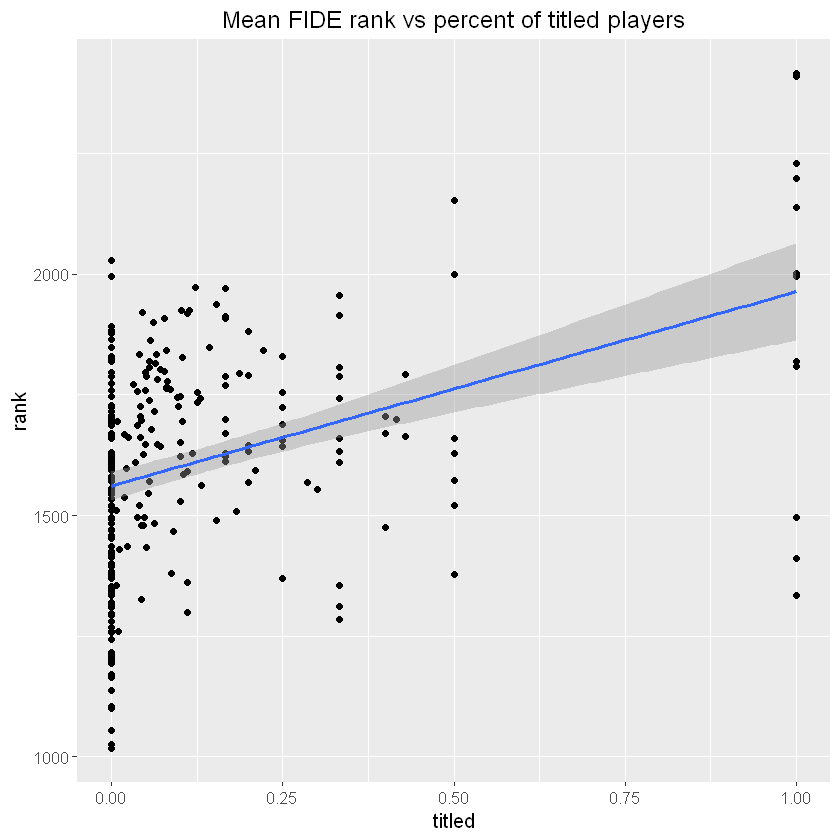

In [217]:
ggplot(fide_data, aes(x = titled, y = rank)) +
geom_point() + 
theme(text=element_text(size=12), plot.title = element_text(hjust = 0.5)) + 
ggtitle("Mean FIDE rank vs percent of titled players") +
geom_smooth(method = "lm")

Widać, że związek między zmienną średni ranking oraz procent utytułowanych zawodników nie jest liniowy. Jest wiele oberwacji, krajów, w których szachy nie są tak popularne lub liczba zawodników jest niewielka przez co liczba utytułowanych graczy jest równa 0 lub 1. 

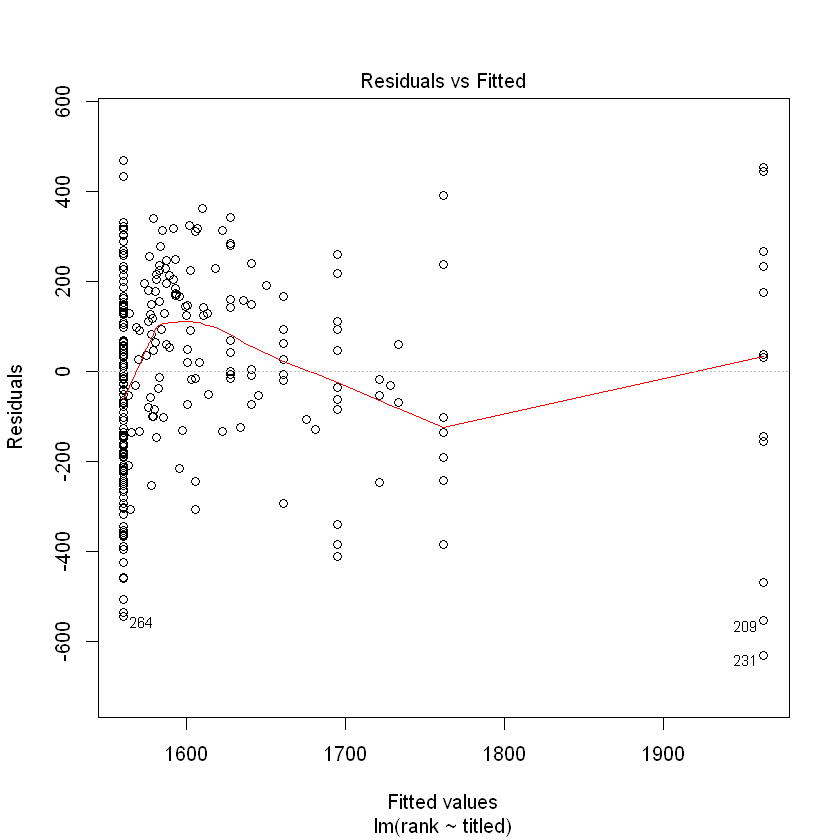

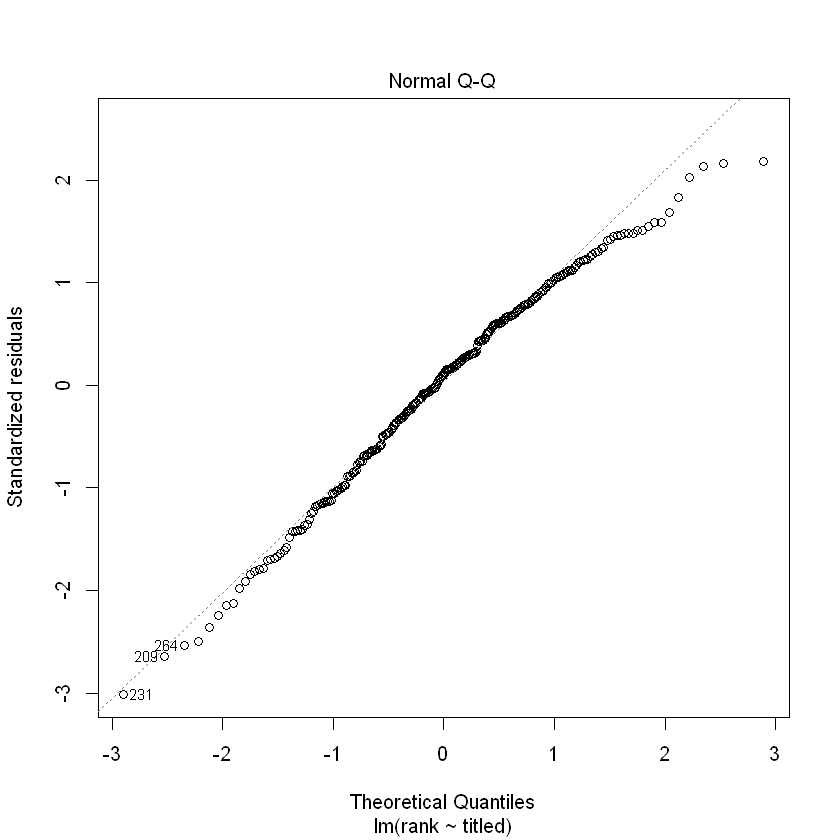

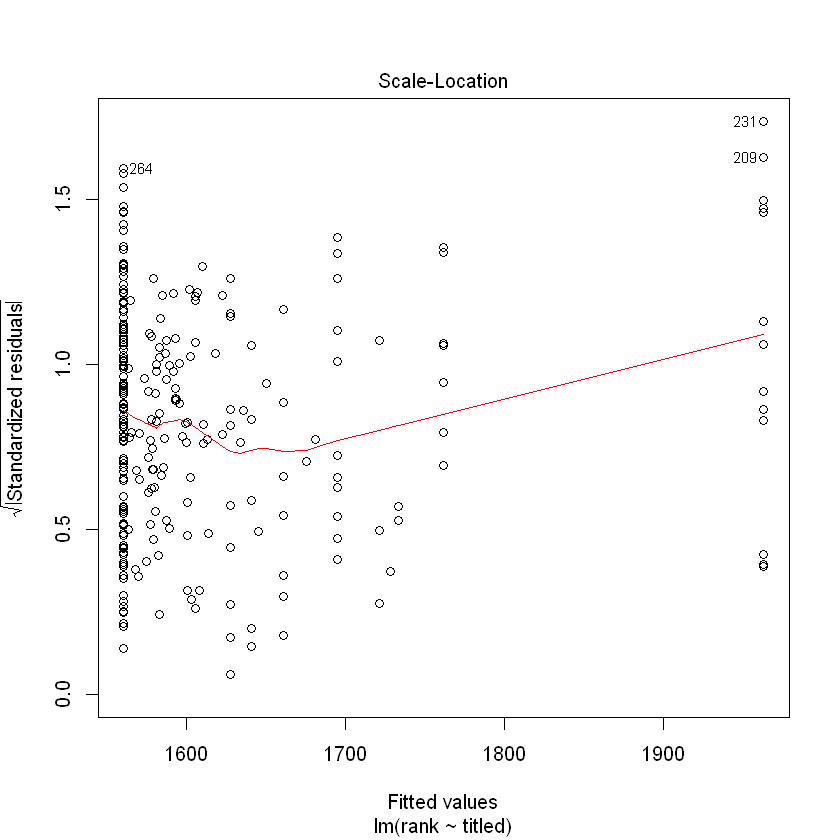

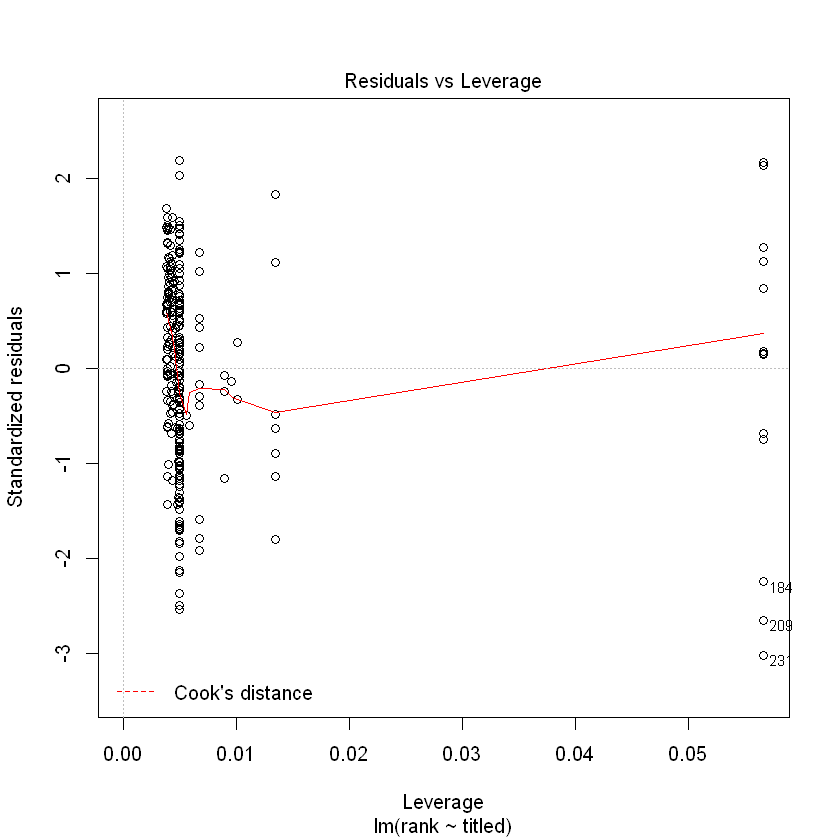

In [227]:
plot(model_titled)

Analizując dalej kolejne diagnostyczne, można zauważyć, że wariancja reszt jest zależna od zmiennej wyjaśniającej. Rozkład reszt jest prawie normalny jednak występują wartości odstające. Założenia więc nie są spełnione.

A na koniec polski akcent:

In [53]:
fide %>% filter(Fed == "POL") %>% top_n(1, Rank) %>% select ("Name")

Name
"Duda, Jan-Krzysztof"


To właśnie ten zawodnik w zeszłym tygodniu pokonał po raz pierwszy aktualnego mistrza świata **Magnusa Carlsena**! Gratulacje!